# **The Sparks Foundation** 

**Author : Hetvi Shah**

# Task 1 : Prediction using Supervised ML

> Predict the percentage of an student based on the no. of study hours.



In [ ]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
%matplotlib inline

In [ ]:
#Reading the Dataset
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
print('Data Imported successfully')

#Printing the first 5 rows of the dataset
data.head(5)

Data Imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


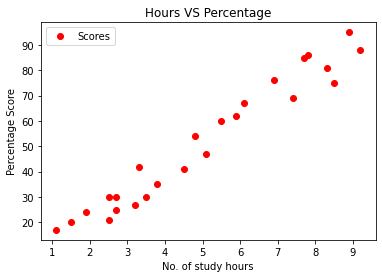

In [ ]:
X_axis= data['Hours']
Y_axis = data['Scores']

#Visualizing our dataset
P1, = plt.plot(X_axis, Y_axis, marker = 'o',ls="",color='r')
plt.title('Hours VS Percentage')
plt.xlabel('No. of study hours')
plt.ylabel('Percentage Score')
plt.legend([P1],['Scores'])
plt.show()



> From the graph above, we can clearly see there is a positive linear regression between the number of hours studied and percentage of score.



# Data Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


We have a total of 25 Rows and 2 columns

In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no missing values in the dataset

In [ ]:
X = np.array(X_axis).reshape(-1,1) #Convert into a numpy array
Y = np.array(Y_axis)

#Dividing the dataset in training and test data.
#The training data consists of 80% of the entire dataset
X_train = X[:int(len(X)*0.8)]
Y_train = Y[:int(len(Y)*0.8)]
X_test = X[int(len(X)*0.8):]
Y_test = Y[int(len(Y)*0.8):]

# Training the model

In [ ]:
#Fit the linear Regression Model
model = LinearRegression().fit(X_train,Y_train)
score = model.score(X_train,Y_train)
print("Model Score :", score)

Model Score : 0.9554562450839484


In [ ]:
#Intercept and coefficients
Intercept = model.intercept_
print("Intercept:", Intercept)
Coefficients = model.coef_
print("Coefficients:", Coefficients)

Intercept: 3.0312830386057854
Coefficients: [9.52038609]


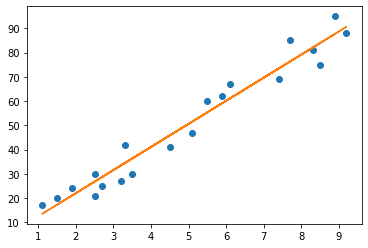

In [ ]:
#Visualizing the regression line on the train data
reg_line = Intercept + np.sum(Coefficients* X_train,axis =1)
plt.plot(X_train,Y_train,marker= 'o', ls= "")
plt.plot(X_train, reg_line, marker='', ls= "-")
plt.show()

# Model testing

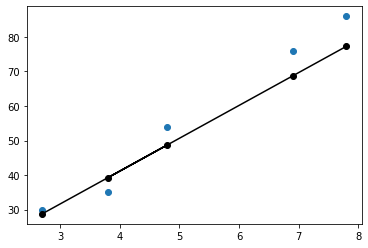

In [ ]:
#Visualizing the test data

#Actual Values VS Predicted Values
Predicted_values = model.predict(X_test)
Actual_values = Y_test
plt.plot(X_test, Y_test,marker = 'o', ls="")
plt.plot(X_test, Predicted_values, color='k',marker='o',ls='-')
plt.show()

In [ ]:
#Building a DataFrame for comparing the predicted values

new_df = pd.DataFrame(data = data[int(len(data)*0.8):])
new_df['Predicted Scores'] = Predicted_values
new_df.replace('Scores','Actual_values')
new_df

,Hours,Scores,Predicted Scores
20,2.7,30,28.736325
21,4.8,54,48.729136
22,3.8,35,39.208750
23,6.9,76,68.721947
24,7.8,86,77.290295


# Metrics

In [ ]:
#Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Predicted_values)) 
print('Root Mean Squared Error:', np.sqrt((np.sum(np.square(Y_test - Predicted_values)))/len(Y_test)))


Mean Absolute Error: 5.346209347444651
Root Mean Squared Error: 5.931635159442733


# Model Prediction

In [ ]:
predict = model.predict([[9.25]])
print("Predicted score if a student studies for 9.25 hrs/day will be", *predict)

Predicted score if a student studies for 9.25 hrs/day will be 91.09485441683265
